In [11]:
%matplotlib inline
import pylab as plt
plt.style.use('fivethirtyeight')

import pandas as pd

In [12]:
data = pd.read_csv('./data/example.csv.gz')

In [38]:
data.head(4)

,x,y,Class
0,0.176449,0.513128,C1
1,0.220460,0.496510,C1
2,0.260471,0.489863,C1
3,0.299147,0.459951,C1


In [14]:
sample1 = data[data.Class == 'C1']
sample2 = data[data.Class == 'C2']

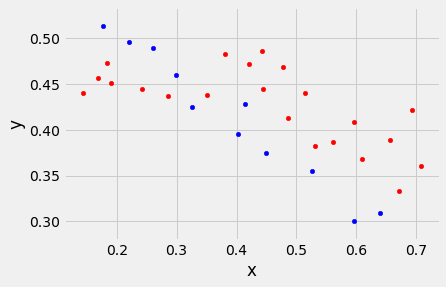

In [15]:
ax = sample1.plot(kind='scatter', x='x', y='y', color='blue')
sample2.plot(kind='scatter', x='x', y='y', color='red', ax=ax)

In [16]:
from sklearn.linear_model import LinearRegression 

In [21]:
model = LinearRegression()
model.fit(sample1[['x']], sample1['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
y_pred = model.predict(sample1[['x']])

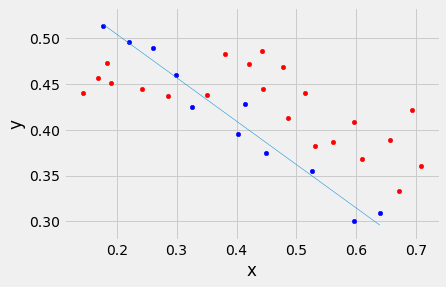

In [28]:
ax = sample1.plot(kind='scatter', x='x', y='y', color='blue')
sample2.plot(kind='scatter', x='x', y='y', color='red', ax=ax)

plt.plot(sample1['x'], y_pred, lw=.5)

In [29]:
model.score(sample1[['x']], sample1['y'])

0.963327945085755

In [30]:
from sklearn.metrics import mean_absolute_error

In [34]:
mean_absolute_error(sample1['y'], y_pred)

0.011297763203141485

### But on the second sample?

In [35]:
y_pred2 = model.predict(sample2[['x']])

In [36]:
mean_absolute_error(sample2['y'], y_pred2)

0.06728207241099735

# Underfit & Overfit

![image](https://docs.aws.amazon.com/machine-learning/latest/dg/images/mlconcepts_image5.png)

## Cross Validation

![image2](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

# Example

In [52]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, median_absolute_error

In [44]:
path = 'https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/queens.csv'
df = pd.read_csv(path)
df.head(3)

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,10234,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Queens
1,10524,1950,1.0,1,950,1,3.0,83,0,0,0,0,0,0,0,0,Forest Hills,Queens
2,5465,3500,1.0,1,996,9,7.0,3,1,0,0,0,0,0,0,0,Astoria,Queens


In [45]:
y = df['rent']
X = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee']]

In [46]:
model = LinearRegression()

In [54]:
scorers = {'mae': make_scorer(mean_absolute_error),
          'medae': make_scorer(median_absolute_error)}

In [55]:
cv = cross_validate(model, X, y, cv=10, scoring=scorers)

In [57]:
cv = pd.DataFrame(cv)
cv

,fit_time,score_time,test_mae,train_mae,test_medae,train_medae
0,0.003190,0.007399,355.604427,379.891519,345.976320,298.986778
1,0.003413,0.003268,455.395844,361.355320,355.810727,286.321896
2,0.003245,0.002103,339.329018,376.402310,266.541804,294.334684
3,0.002534,0.003549,418.283133,372.551340,294.155355,300.031723
4,0.004179,0.003442,343.437697,378.911696,260.931336,297.623239
5,0.002523,0.002038,413.383084,369.159037,291.894172,300.743700
6,0.002280,0.001980,348.288631,378.823786,284.091285,298.016161
7,0.002232,0.001691,371.455104,376.145816,313.257685,304.033083
8,0.002035,0.001500,401.991244,375.201457,312.617748,294.116631
9,0.002193,0.001799,390.384333,375.652788,327.953280,306.226649


In [58]:
cv.mean()

fit_time         0.002782
score_time       0.002877
test_mae       383.755252
train_mae      374.409507
test_medae     305.322971
train_medae    298.043454
dtype: float64

# Other types

- timeseries kfold
- Stratified kfold
- ...